# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

Craft your problem statement here using the prompt from the README and other sources you find during your investigation.

## Executive Summary
Write an executive summary that summarizes the problem and your key findings.

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline


## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
driving_license = pd.read_csv("../data/saudi-arabia-driving-licenses-2004-2008.csv", sep=';', index_col= [0])
traffic_accidents = pd.read_csv("../data/saudi-arabia-traffic-accidents-2008.csv", sep=";", index_col= [0])
traffic_accidents = traffic_accidents.drop('Unnamed: 0.1', axis = 1)

#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
traffic_accidents.Region.unique()

array(['Makkah', 'Eastern Region', 'Tabouk', 'Hail', 'Northern Boarder',
       'Jazan', 'Al-Jouf', 'Total', 'Al-Baaha', 'Riyadh', 'Madinah',
       'Qassim', 'Najran', 'Asir'], dtype=object)

In [4]:
driving_license.head(n=10)

,Year,Administritive Area,Driving Liceses,geo_point_2d
0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

Answer: Traffic accidents data include the following keys: year(2016,2017), region, indicator, value, geografic point.

#### 4a. How complete is the data?

Investigate missing values etc.

In [5]:
traffic_accidents.isnull().sum()

Year            0
Region          0
Indicator       0
Value           0
geo_point_2d    6
dtype: int64

In [6]:
driving_license.isnull().sum()

Year                    0
Administritive Area     0
Driving Liceses         0
geo_point_2d           25
dtype: int64

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [7]:
traffic_accidents['Value'] = traffic_accidents['Value'].map(lambda x: x.strip('n'))
traffic_accidents['Value'] = pd.to_numeric(traffic_accidents['Value'])
traffic_accidents['Year'] = traffic_accidents['Year'].str.replace("(","").str.replace(")","")
traffic_accidents['Year'] = pd.to_numeric(traffic_accidents['Year'])
traffic_accidents.head()

,Year,Region,Indicator,Value,geo_point_2d
0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334"
1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439"
2,2016,Tabouk,No. of Casualties - Dead,434,"27.90165499, 37.2598581394"
3,2016,Hail,No. of Casualties - Dead,299,"27.400845724, 41.4406960508"
4,2016,Hail,No. of Accidents,10199,"27.400845724, 41.4406960508"


In [8]:
driving_license['Driving Liceses'] = driving_license['Driving Liceses'].map(lambda x: x.strip('n'))
driving_license['Driving Liceses'] = pd.to_numeric(driving_license['Driving Liceses'])
driving_license['Year'] = driving_license['Year'].str.replace("(","").str.replace(")","")
driving_license['Year'] = pd.to_numeric(driving_license['Year'])
driving_license.head()

,Year,Administritive Area,Driving Liceses,geo_point_2d
0,2012,Makkah,143954,"21.628962766, 41.2636898334"
1,1994,Makkah,75349,"21.628962766, 41.2636898334"
2,1998,Makkah,86082,"21.628962766, 41.2636898334"
3,2004,Makkah,86636,"21.628962766, 41.2636898334"
4,2005,Makkah,65099,"21.628962766, 41.2636898334"


In [9]:
traffic_accidents['Value'].min(), traffic_accidents['Value'].max()

(112, 533380)

In [10]:
driving_license['Driving Liceses'].min() , driving_license['Driving Liceses'].max()

(915, 928165)

In [11]:
traffic_accidents.describe()

,Year,Value
count,84.000000,84.000000
mean,2016.500000,25754.928571
std,0.503003,80358.979134
min,2016.000000,112.000000
25%,2016.000000,771.250000
50%,2016.500000,2251.000000
75%,2017.000000,11880.500000
max,2017.000000,533380.000000


In [12]:
driving_license.describe()

,Year,Driving Liceses
count,350.000000,350.000000
mean,2005.000000,53699.931429
std,7.221426,109460.651788
min,1993.000000,915.000000
25%,1999.000000,5010.750000
50%,2005.000000,10876.500000
75%,2011.000000,42361.500000
max,2017.000000,928165.000000


#### 5. What are your data types? 
Display the data types of each feature. 

In [13]:
traffic_accidents.dtypes

Year             int64
Region          object
Indicator       object
Value            int64
geo_point_2d    object
dtype: object

In [14]:
driving_license.dtypes

Year                    int64
Administritive Area    object
Driving Liceses         int64
geo_point_2d           object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: I fixed the types

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

- Make new columns `x` and `y` using `geo_point_2d`

In [15]:
driving_license['X'], driving_license['Y'] = driving_license['geo_point_2d'].str.split(",").str
driving_license = driving_license.drop('geo_point_2d', axis = 1)
driving_license.head()

,Year,Administritive Area,Driving Liceses,X,Y
0,2012,Makkah,143954,21.628962766,41.2636898334
1,1994,Makkah,75349,21.628962766,41.2636898334
2,1998,Makkah,86082,21.628962766,41.2636898334
3,2004,Makkah,86636,21.628962766,41.2636898334
4,2005,Makkah,65099,21.628962766,41.2636898334


In [16]:
traffic_accidents['X'], traffic_accidents['Y'] = traffic_accidents['geo_point_2d'].str.split(",").str
traffic_accidents = traffic_accidents.drop('geo_point_2d', axis = 1)

traffic_accidents.head()

,Year,Region,Indicator,Value,X,Y
0,2016,Makkah,No. of Casualties - Injured,12383,21.628962766,41.2636898334
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.2883307307,50.1478302439
2,2016,Tabouk,No. of Casualties - Dead,434,27.90165499,37.2598581394
3,2016,Hail,No. of Casualties - Dead,299,27.400845724,41.4406960508
4,2016,Hail,No. of Accidents,10199,27.400845724,41.4406960508


In [17]:
traffic_accidents['X'] = traffic_accidents['X'].map(lambda x: float(x))
traffic_accidents['Y'] = traffic_accidents['Y'].map(lambda x: float(x))
driving_license['X'] = driving_license['X'].map(lambda x: float(x))
driving_license['Y'] = driving_license['Y'].map(lambda x: float(x))

In [18]:
traffic_accidents.dtypes

Year           int64
Region        object
Indicator     object
Value          int64
X            float64
Y            float64
dtype: object

In [19]:
driving_license.dtypes

Year                     int64
Administritive Area     object
Driving Liceses          int64
X                      float64
Y                      float64
dtype: object

- Fix any individual values preventing other columns from being the appropriate type.

In [20]:
# traffic_accidents['Value'] = traffic_accidents['Value'].map(lambda x: x.strip('n'))
# traffic_accidents['Value'] = pd.to_numeric(traffic_accidents['Value'])
# traffic_accidents['Year'] = traffic_accidents['Year'].str.replace("(","").str.replace(")","")
# traffic_accidents['Year'] = pd.to_numeric(traffic_accidents['Year'])
# traffic_accidents.head()

# driving_license['Driving Liceses'] = driving_license['Driving Liceses'].map(lambda x: x.strip('n'))
# driving_license['Driving Liceses'] = pd.to_numeric(driving_license['Driving Liceses'])
# driving_license['Year'] = driving_license['Year'].str.replace("(","").str.replace(")","")
# driving_license['Year'] = pd.to_numeric(driving_license['Year'])
# driving_license.head()

- Finish your data modifications by making sure the columns are now typed appropriately.

In [48]:
traffic_accidents.dtypes

year        int64
region     object
ind        object
value       int64
x_acc     float64
y_acc     float64
dtype: object

- Display the data types again to confirm they are correct.

In [21]:
traffic_accidents.dtypes

Year           int64
Region        object
Indicator     object
Value          int64
X            float64
Y            float64
dtype: object

In [22]:
driving_license.dtypes

Year                     int64
Administritive Area     object
Driving Liceses          int64
X                      float64
Y                      float64
dtype: object

#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [23]:
driving_license.columns =['year','region','num_lic','x_lic','y_lic']
driving_license.head()

,year,region,num_lic,x_lic,y_lic
0,2012,Makkah,143954,21.628963,41.26369
1,1994,Makkah,75349,21.628963,41.26369
2,1998,Makkah,86082,21.628963,41.26369
3,2004,Makkah,86636,21.628963,41.26369
4,2005,Makkah,65099,21.628963,41.26369


In [24]:
traffic_accidents.columns= ['year','region','ind','value','x_acc','y_acc']
traffic_accidents.head()

,year,region,ind,value,x_acc,y_acc
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.263690
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299,27.400846,41.440696
4,2016,Hail,No. of Accidents,10199,27.400846,41.440696


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|lic_yr|int|Driving_Licenses|Year driving license issued| 
|region|object|Driving_Licenses|Region driving license issued| 
|num_lic|int|Driving_Licenses|Number of driving licenses issued| 
|x_lic|float|Driving_Licenses|Longitude of region for driving license| 
|y_lic|float|Driving_Licenses|Latitude of region for driving license| 
|acc_yr|int|Traffic_Accidents|Year of traffic accident observation| 
|region|object|Traffic_Accidents|Region of traffic accident| 
|ind|object|Traffic_Accidents|Indicator of traffic accident and type of casualty| 
|value|int|Traffic_Accidents|value for indicator and type of casualty traffic accident| 
|x_acc|float|Traffic_Accidents|Longitude of Region for traffic accident| 
|y_acc|float|Traffic_Accidents|Latitude of Region for traffic accident| 

#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [25]:
total_dl = driving_license[driving_license['region'] == 'Total']
total_dl_ind = list(total_dl.index)
driving_license = driving_license.drop(total_dl_ind, axis=0)

In [26]:
total_ta = traffic_accidents[traffic_accidents['region'] == 'Total']
total_ta_ind = list(total_ta.index)
traffic_accidents = traffic_accidents.drop(total_ta_ind, axis=0)

In [27]:
traffic_accidents.replace(to_replace='Qassim', value='Al-Qaseem',inplace=True)
traffic_accidents.replace(to_replace='Asir', value='Assir',inplace=True)
traffic_accidents.replace(to_replace='Al-Baaha', value='Al-Baha',inplace=True)
driving_license.replace(to_replace='Eastern', value='Eastern Region',inplace=True)

#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

Answer: License is in wide format because there are key identifies repeating for each value
while accident data is long where indicators are listing different values for each region per year

#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

In [28]:
traffic_accidents.head(10)

,year,region,ind,value,x_acc,y_acc
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.263690
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299,27.400846,41.440696
4,2016,Hail,No. of Accidents,10199,27.400846,41.440696
5,2016,Northern Boarder,No. of Casualties - Dead,193,30.197075,41.817119
6,2017,Jazan,No. of Accidents,22161,17.207231,42.652581
7,2017,Al-Jouf,No. of Accidents,10469,29.967745,39.557037
9,2016,Northern Boarder,No. of Casualties - Injured,631,30.197075,41.817119
10,2016,Jazan,No. of Casualties - Dead,514,17.207231,42.652581


In [29]:
pivot_acc = traffic_accidents.pivot_table(index=['year','region'],columns='ind', values='value')

In [30]:
pivot_acc.columns.name = None

In [31]:
pivot_acc.reset_index(inplace=True)

In [32]:
pivot_acc.head()

,year,region,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
0,2016,Al-Baha,3618,185,1227
1,2016,Al-Jouf,10212,245,920
2,2016,Al-Qaseem,25664,397,1513
3,2016,Assir,32684,983,2541
4,2016,Eastern Region,101619,1113,4893


In [33]:
driving_license.head(10)

,year,region,num_lic,x_lic,y_lic
0,2012,Makkah,143954,21.628963,41.263690
1,1994,Makkah,75349,21.628963,41.263690
2,1998,Makkah,86082,21.628963,41.263690
3,2004,Makkah,86636,21.628963,41.263690
4,2005,Makkah,65099,21.628963,41.263690
5,2008,Makkah,77013,21.628963,41.263690
6,2014,Madinah,31447,24.927535,39.491824
7,2013,Madinah,28513,24.927535,39.491824
8,2012,Madinah,14459,24.927535,39.491824
9,1994,Madinah,3767,24.927535,39.491824


In [34]:
pivot_lic = driving_license.pivot_table(index=['year','region'], values='num_lic')

In [35]:
pivot_lic.head()

num_lic
year region                 
1993 Al-Baha            3270
     Al-Jouf            2884
     Al-Qaseem         73618
     Assir              6226
     Eastern Region     9964

#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [36]:
merge_df = pd.merge(pivot_acc,pivot_lic, on = ['year','region'], how = 'inner')
merge_df

,year,region,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured,num_lic
0,2016,Al-Baha,3618,185,1227,4614
1,2016,Al-Jouf,10212,245,920,9371
2,2016,Al-Qaseem,25664,397,1513,9180
3,2016,Assir,32684,983,2541,41367
4,2016,Eastern Region,101619,1113,4893,142307
5,2016,Hail,10199,299,932,54507
6,2016,Jazan,25873,514,2259,11504
7,2016,Madinah,14475,822,4184,24540
8,2016,Makkah,134838,2243,12383,136055
9,2016,Najran,3235,173,706,2153


In [37]:
merge_df.columns = ['year','region','no_accidents','no_dead','no_injured','no_licenses']
merge_df.head()

,year,region,no_accidents,no_dead,no_injured,no_licenses
0,2016,Al-Baha,3618,185,1227,4614
1,2016,Al-Jouf,10212,245,920,9371
2,2016,Al-Qaseem,25664,397,1513,9180
3,2016,Assir,32684,983,2541,41367
4,2016,Eastern Region,101619,1113,4893,142307


#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [47]:
mexa=merge_df.to_csv('./combined_datasets.csv')
mexaaaaa = pd.read_csv('./combined_datasets.csv')

mexaaaaa.head(10)

,Unnamed: 0,year,region,no_accidents,no_dead,no_injured,no_licenses
0,0,2016,Al-Baha,3618,185,1227,4614
1,1,2016,Al-Jouf,10212,245,920,9371
2,2,2016,Al-Qaseem,25664,397,1513,9180
3,3,2016,Assir,32684,983,2541,41367
4,4,2016,Eastern Region,101619,1113,4893,142307
5,5,2016,Hail,10199,299,932,54507
6,6,2016,Jazan,25873,514,2259,11504
7,7,2016,Madinah,14475,822,4184,24540
8,8,2016,Makkah,134838,2243,12383,136055
9,9,2016,Najran,3235,173,706,2153


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [ ]:
merge_df.describe()

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [ ]:
def mean(values):
    return sum(values * (1/len(values)))

def stdev(values):
    length = len(values)
    m = mean(values)
    total_sum = 0
    for i in range(length):
        total_sum += (values[i]-m)**2
    underroot = total_sum*(1/length)
    root = underroot ** (1/2)
    return root

In [ ]:
merge_df.info()

In [ ]:
stdev(merge_df['no_accidents'].values)

In [ ]:
np.std(merge_df['no_accidents'])

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [ ]:
{column: stdev(merge_df[column]) for column in merge_df[['no_accidents','no_dead','no_injured','no_licenses']].columns}

In [ ]:
merge_df.describe()

In [ ]:
np.std(merge_df[['no_accidents','no_dead','no_injured','no_licenses']])

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [ ]:
group1_dl = driving_license.groupby(['year','region'],sort=True)['num_lic'].agg({'num_lic':'sum'})
group2_dl = group1_dl['num_lic'].groupby(level=0, group_keys=False)

In [ ]:
group2_dl.nlargest(1)

In [ ]:
group2_dl.nsmallest(1)

In [ ]:
group1_ta = traffic_accidents.groupby(['year','region'],sort=True)['value'].agg({'value':'sum'})
group2_ta = group1_ta['value'].groupby(level=0, group_keys=False)

In [ ]:
group2_ta.nlargest(1),group2_ta.nsmallest(1)

In [ ]:
dl_mean_per_yr = group2_dl.agg({'mean_num_lic':'mean'})
dl_mean_per_yr
dic_dl_mean = dict(enumerate(dl_mean_per_yr.mean_num_lic, 1993))

In [ ]:
# pivot_lic['mean_num_lic'] = pivot_lic.year.map(dic_dl_mean)
# lic_over_mean= pivot_lic[pivot_lic['num_lic'] > pivot_lic['mean_num_lic']]
# grouped_lic_over_mean = lic_over_mean.groupby(['year','mean_num_lic','region'],sort=True)['num_lic'].agg({'num_lic':'sum'})
# grouped_lic_over_mean

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [ ]:
merge_corr = merge_df.corr()
sns.heatmap(merge_corr, annot = True).set_title('Correlation');

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [ ]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(7, 4 * nrows)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])        
        # Set titles, labels, etc here for each subplot

In [ ]:
subplot_histograms

(dataframe = merge_df,list_of_columns=['no_licenses','no_dead','no_injured','no_accidents'],list_of_titles = ['no_licenses','no_dead','no_injured','no_accidents'],list_of_xlabels=['no_licenses','no_dead','no_injured','no_accidents'])

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

In [ ]:
pivot_acc.head()

In [ ]:
pivot_lic.head()

In [ ]:
df_merged_grp = pd.pivot_table(merge_df, index=['region', 'year'], columns=[])
df_merged_grp.head()
merge_df.head()

In [ ]:
pivot_lic_= pivot_lic.pivot_table(index='year' , columns='region', values='num_lic')
pivot_lic_.head()

In [ ]:
merge_df.hist(column=['no_accidents','no_dead','no_injured','no_licenses'],figsize=(8,8) , bins=20);

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [ ]:
merge_df.head()

In [ ]:
merge_df_2017 = merge_df[merge_df["year"]==2017]

sns.scatterplot(x ="no_accidents", y = "no_licenses", data =merge_df);

In [ ]:
merge_df_2016 = merge_df[merge_df["year"]==2016]

sns.scatterplot(x ="no_accidents", y = "no_licenses", data =merge_df_2016);

In [ ]:
acc_2016 = merge_df[merge_df["year"]==2016]["no_accidents"]
acc_2017 = merge_df[merge_df["year"]==2017]["no_accidents"]
plt.scatter(x =acc_2016, y =acc_2017, data =merge_df, color = "green" );

In [ ]:
lic_2016 = merge_df[merge_df["year"]==2016]["no_licenses"]
lic_2017 = merge_df[merge_df["year"]==2017]["no_licenses"]

plt.scatter(x =lic_2016, y =lic_2017, data =merge_df, color="darkred");

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [ ]:
sns.boxplot(data = merge_df[['no_accidents','no_dead','no_injured','no_licenses']])
plt.xticks(rotation=15)
plt.title('Boxplot for each variable')

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [53]:
merge_df_bar= merge_df.groupby(['no_licenses', 'no_accidents'])

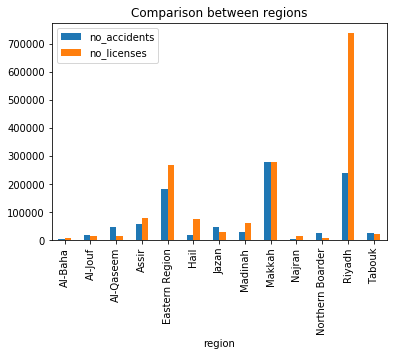

In [54]:
merge_df_bar=merge_df.groupby('region').sum()
merge_df_bar= merge_df_bar.drop(labels=['year','no_dead','no_injured'],axis=1)
merge_df_bar

ax = merge_df_bar.plot(kind='bar')
ax.legend(loc=0)
ax.set_title('Comparison between regions');

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [55]:
#Answers:
merge_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,26.0,2016.500000,0.509902,2016.0,2016.00,2016.5,2017.00,2017.0
no_accidents,26.0,38225.692308,46493.705035,1414.0,10276.25,16050.5,30981.25,145541.0
no_dead,26.0,635.384615,549.783381,112.0,241.25,415.5,929.25,2243.0
no_injured,26.0,2743.038462,2922.641127,374.0,923.00,1618.5,3784.00,12383.0
no_licenses,26.0,62507.000000,107293.917762,2153.0,8363.25,16085.0,51222.00,495307.0


In [56]:
from scipy import stats
import numpy as np
import scipy as scipy
import scipy.stats as stats
%matplotlib inline

print(stats.mode(merge_df['no_accidents']))
print(stats.mode(merge_df['no_dead']))
print(stats.mode(merge_df['no_injured']))
print(stats.mode(merge_df['no_licenses']))

ModeResult(mode=array([1414]), count=array([1]))
ModeResult(mode=array([112]), count=array([1]))
ModeResult(mode=array([374]), count=array([1]))
ModeResult(mode=array([2153]), count=array([1]))


**1** no_dead:
    
mean = 635, median= 415, mode = 112

mean is greater than the median

therefore the distibution is positevly skewed

**2** no_accidents:
mean = 38225.6, median = 16050.5, mode = 1414

mean is greater than the median

therefore the distibution is positevly skewed

**3** no_injured:
mean = 2743, median = 1618.5, mode = 374

mean is greater than the median

therefore the distibution is positevly skewed

**4** no_licenses:
mean = 62507, median = 16085, mode = 2153

mean is greater than the median

therefore the distibution is positevly skewed

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: **They are both positivlty skewed, not normally distributed. When making assumption using a regression we assume the data is normally distributed, therefore the predictions and statistical techniques will not be very effective and informative. Therefore, advanced methamatics may be used to such as logs and quantile regressions are used.**

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: **They are both positivlty skewed, not normally distributed. When making assumption using a regression we assume the data is normally distributed, therefore the predictions and statistical techniques will not be very effective and informative. Therefore, advanced methamatics may be used to such as logs and quantile regressions are used.**

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

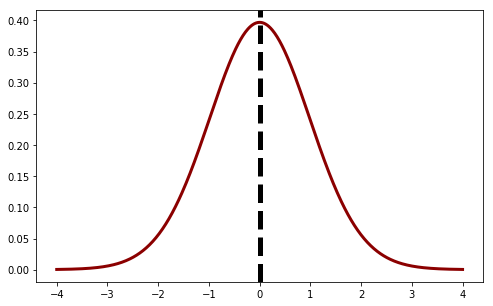

In [62]:
t_test_result = stats.ttest_ind(merge_df.no_accidents, merge_df.no_accidents)
t_test_result.statistic, t_test_result.pvalue

xpts = np.linspace(-4, 4, 500)
ypts = stats.t.pdf(xpts, len(merge_df.no_accidents) + len(merge_df.no_accidents) - 2, 0, 1)

fig = plt.figure(figsize=(8, 5)) # set figure size on fig
ax = fig.gca() # get the current axis from the figure initiated
ax.plot(xpts, ypts, linewidth=3, color='darkred')
ax.axvline(t_test_result.statistic, color='black', lw=5, linestyle='--')
plt.show()

In [63]:
t_test_result = stats.ttest_ind(merge_df.no_accidents, merge_df.no_accidents)
t_test_result.statistic, t_test_result.pvalue

(0.0, 1.0)

In [71]:
merge_df_bar.head(30)

,no_accidents,no_licenses
region,,
Al-Baha,5032,8745
Al-Jouf,20681,17462
Al-Qaseem,48069,15498
Assir,57929,80500
Eastern Region,183052,269123
Hail,19578,76542
Jazan,48034,29849
Madinah,30545,60705
Makkah,280379,278542


## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

**Answer:** 
**Makkah, Riyadh & Eastern Region has the most numbers of accidents**

**Riyadh, Makkah & Eastern Region has the most numbers of driving licenses**

## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?
- Are there additional data you desire that would better inform your investigations?

Answer: **Do not use your phone, drink your coffee, follow the rules & do not bother me if your car punished** 